In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA, FastICA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from IPython.display import HTML

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
data = pd.read_csv("..../Wholesale customers data.csv")

In [5]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
df=data.drop(['Channel','Region'], axis=1)

In [7]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


Explortory analysis 

In [8]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Fresh and Grocery having the highest standard deviations of 12,647 and 9,503 respectively.
These two items to have a high significance (magnitude) in the eigenvector.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110ca65f8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1140f4cf8>]], dtype=object)

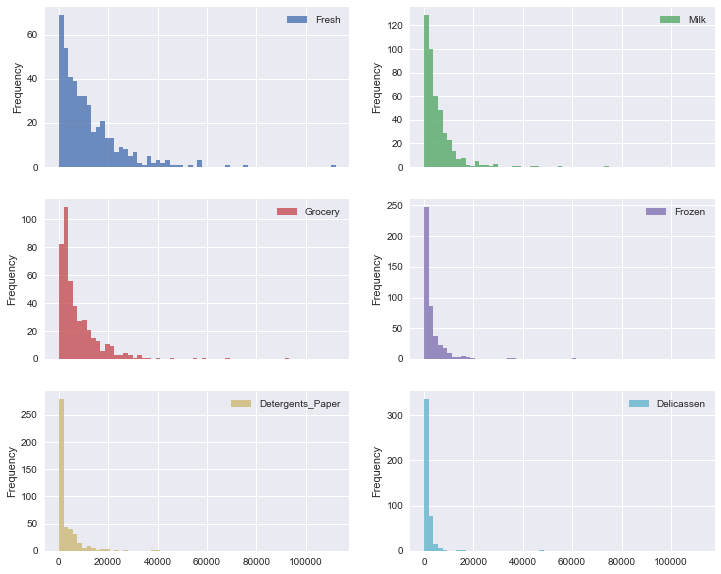

In [9]:
# Histogram
#plt.figure(figsize=(10,8))
df.plot(kind='hist', alpha=0.8,bins=60, subplots=True,layout=(3,2),legend=True,figsize=(12,10))

The histograms show an exponential decline in the number of orders for the respected products.
hence this could be a cluster consisting of larger size companies with higher purchase quanitites for these particular items.

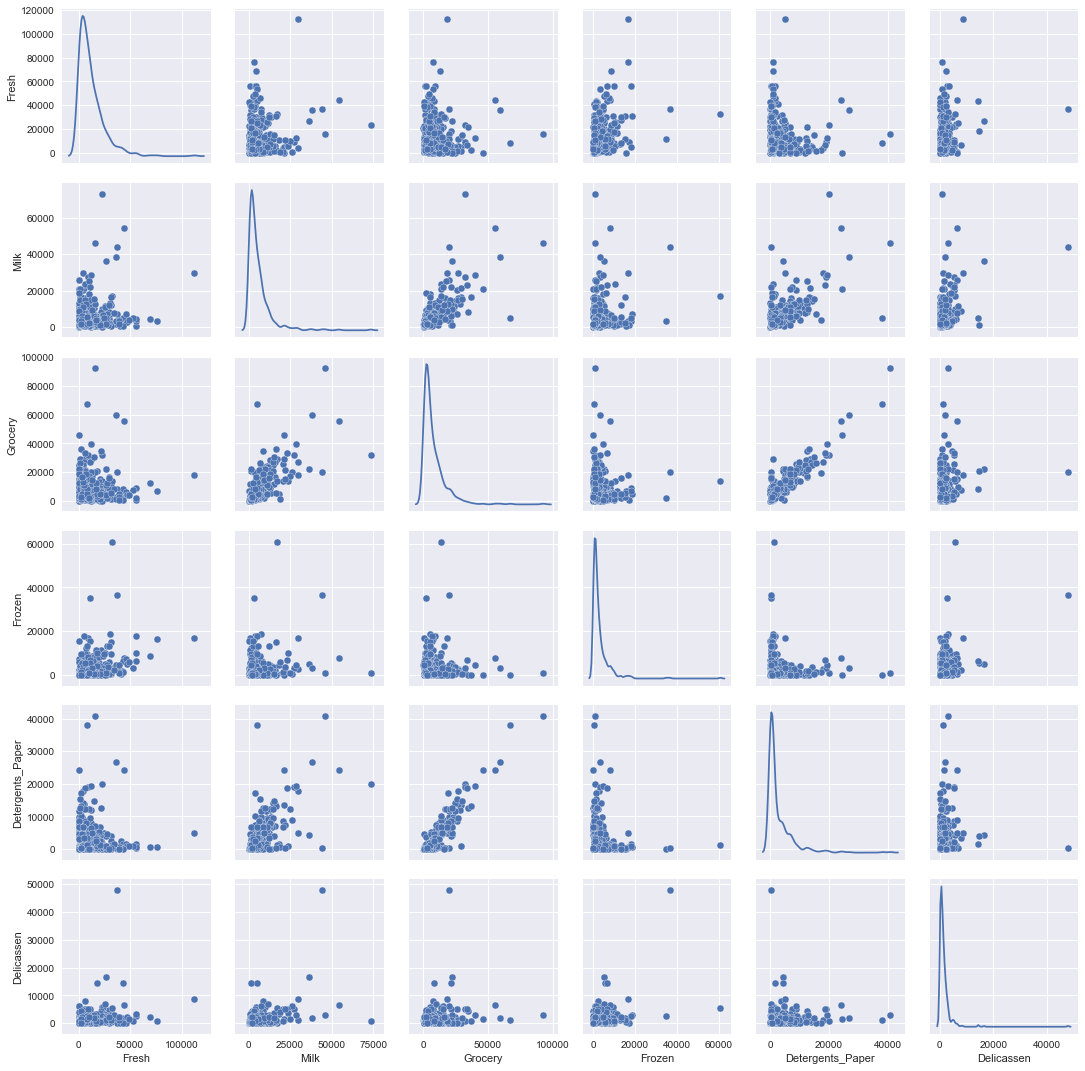

In [10]:
plot1=sns.pairplot(df, diag_kind='kde')

In [11]:
mean_df=df.describe().loc['mean',:]
mean_df

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
Name: mean, dtype: float64

Comparing percentiles

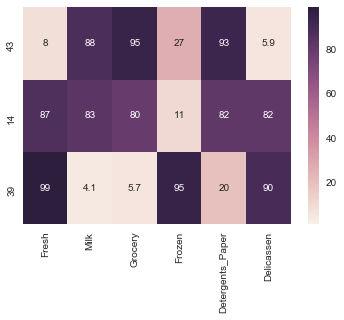

In [12]:
# Select three indices to sample from the dataset
indices = [43, 14, 39]

percentile=df.rank(pct=True)
percentile=100*percentile.round(decimals=3)
percentile=percentile.iloc[indices]
sns.heatmap(percentile,vmin=1, vmax=99, annot=True)

In [13]:
# Correlation Matrix
corr=df.corr()
corr

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


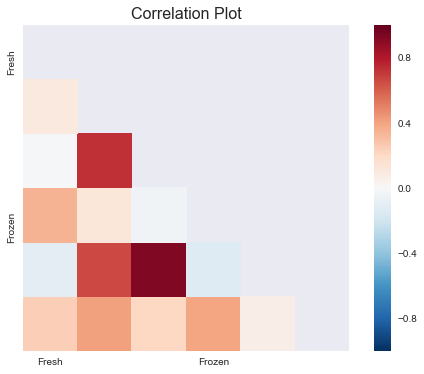

In [14]:
# Generate a mask for upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 6))


# Draw the heatmap
plt.title("Correlation Plot",fontsize=16)
sns.heatmap(corr, mask=mask, square=True,xticklabels=3, yticklabels=3)

In [15]:
# Co Variance Matrix
cov=df.cov()
cov

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.599549e+08,9.381789e+06,-1.424713e+06,2.123665e+07,-6.147826e+06,8.727310e+06
Milk,9.381789e+06,5.446997e+07,5.108319e+07,4.442612e+06,2.328834e+07,8.457925e+06
Grocery,-1.424713e+06,5.108319e+07,9.031010e+07,-1.854282e+06,4.189519e+07,5.507291e+06
Frozen,2.123665e+07,4.442612e+06,-1.854282e+06,2.356785e+07,-3.044325e+06,5.352342e+06
Detergents_Paper,-6.147826e+06,2.328834e+07,4.189519e+07,-3.044325e+06,2.273244e+07,9.316807e+05
Delicassen,8.727310e+06,8.457925e+06,5.507291e+06,5.352342e+06,9.316807e+05,7.952997e+06


Principal Component Analysis (PCA) is utilized to identify patterns in dataset based on the correlation between the n-features. 
PCA attempts to find the directions of maximum variance in a high-dimensional data (d) and then projects it onto a new subspace (k<=d). 